<a href="https://colab.research.google.com/github/kjedrzejczak/Wprowadzenie_do_sieci_neuronowych-Tensorflow_2.0-Keras/blob/main/01_Digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.15.0


In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()

print(X_train.shape)
print(y_train.shape)
print()
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)

(10000, 28, 28)
(10000,)


In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [ ]:
print(X_train[0].shape)

(28, 28)


Tylko dane uczące 👈

In [ ]:
X_train = X_train / 255.  # skalowanie danych
X_test = X_test / 255.

(-0.5, 27.5, 27.5, -0.5)

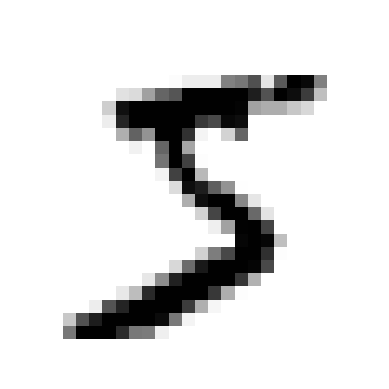

In [ ]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

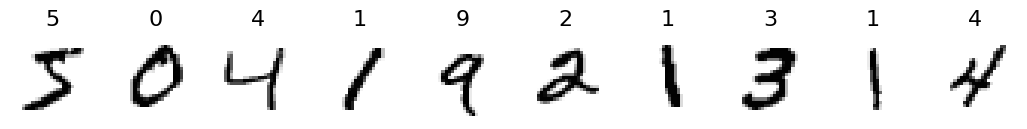

In [ ]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
  plt.subplot(1, 10, i)
  plt.axis('off')
  plt.imshow(X_train[i-1], cmap='gray_r')
  plt.title(y_train[i-1], color='black', fontsize=16)
plt.show()

Budowa sieci neuronowej

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))  # 👈 liczba neuronów musi odpowiadać liczbie klas

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=5) # epochs krotność przejscia przez sieć

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0642 - accuracy: 0.9797
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0554 - accuracy: 0.9820
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0519 - accuracy: 0.9833
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0478 - accuracy: 0.9839
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0439 - accuracy: 0.9851


In [ ]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0673 - accuracy: 0.9800 - 622ms/epoch - 2ms/step


[0.06725235283374786, 0.9800000190734863]

In [ ]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.064198,0.979650
1,0.055397,0.982033
2,0.051930,0.983250
3,0.047789,0.983883
4,0.043930,0.985100


In [ ]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800)

Predykcja

In [ ]:
model.predict(X_test)


313/313 [==============================] - 1s 2ms/step


array([[0.000000009878, 0.000000003294, 0.000000023808, ..., 0.9998842     , 0.000000125436, 0.000005279484],
       [0.000000000872, 0.000055267374, 0.9999444     , ..., 0.            , 0.000000000658, 0.            ],
       [0.000000002045, 0.99957484    , 0.000004175008, ..., 0.0002751977  , 0.00012556682 , 0.000000009233],
       ...,
       [0.            , 0.            , 0.            , ..., 0.000000044115, 0.000000000236, 0.000000233092],
       [0.            , 0.            , 0.            , ..., 0.000000000008, 0.000002898821, 0.            ],
       [0.000000000033, 0.            , 0.000000003039, ..., 0.            , 0.000000000014, 0.000000000001]],
      dtype=float32)

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
y_pred

313/313 [==============================] - 2s 6ms/step


array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_predict = np.argmax(model.predict(X_test), axis=-1)  # 👈👈👈👈👈
y_predict

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_predict, columns=['y_pred'])], axis=1)
pred

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [ ]:
missclassified = pred[pred['y_test'] != pred['y_pred']]
missclassified.index[:10]

Index([8, 115, 247, 266, 321, 340, 381, 445, 449, 495], dtype='int64')

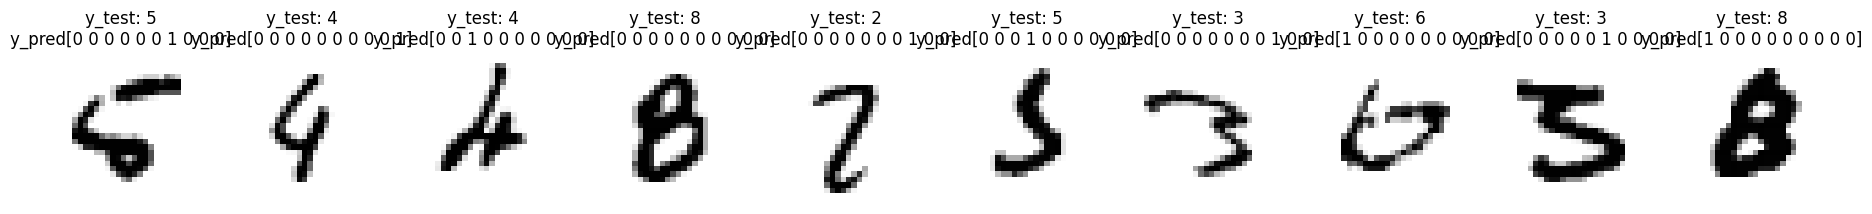

In [ ]:
plt.figure(figsize=(23, 23))
for i, j in zip(range(1, 11), missclassified.index[:10]):
  plt.subplot(1, 10, i)
  plt.axis('off')
  plt.imshow(X_test[j], cmap='gray_r')
  plt.title('y_test: ' + str(y_test[j]) + '\n' + 'y_pred' + str(y_pred[j]), color='black', fontsize=12)
plt.show()